In [1]:
from PIL import Image, ImageOps
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from scipy.sparse import lil_matrix, csr_matrix
from sklearn.manifold import SpectralEmbedding
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
df = pd.read_csv('data/filtered_df2.csv') #loading data
image_files = list(df['Image'])
batch_features = []

for i in range(0, len(image_files), 32): #batch size is 32; need to load it 
    #print(i)
    batch_files = image_files[i:i+32]
    for file in batch_files:
        img = Image.open("data/eyeball_img/" + file).convert('RGB')
        img = ImageOps.grayscale(img) 
        # Split into 3 channels
        #r, g, b = img.split()
        img_array = np.asarray(img, dtype=np.float32) / 255.0
        batch_features.append(img_array.flatten())
        #print(len(batch_features))

batch_features = np.array(batch_features)    
assert batch_features.shape == (2589, 524288)

In [3]:
data = np.load("le_results.npz")

In [4]:
df2 = df
df2['x'] = data['X'] # first coord
df2['y'] = data['Y']  # second coord
df2['z'] = data['Z']  # third coord
df2['a'] = data['A']  
df2['b'] = data['B']
df2['c'] = data['C']
df2['d'] = data['D']
df2['e'] = data['E']

In [7]:
colors = []
for index, row in df2.iterrows():
    if row['N'] == 1:
        colors.append('grey')
    elif row['D'] == 1:
        colors.append('red')
    elif row['G'] == 1:
        colors.append('yellow')
    elif row['C'] == 1:
        colors.append('green')
    elif row['A'] == 1:
        colors.append('orange')
    elif row['H'] == 1:
        colors.append('pink')
    elif row['M'] == 1:
        colors.append('blue')
    elif row['O'] == 1:
        colors.append('purple')

<Axes: xlabel='x', ylabel='y'>

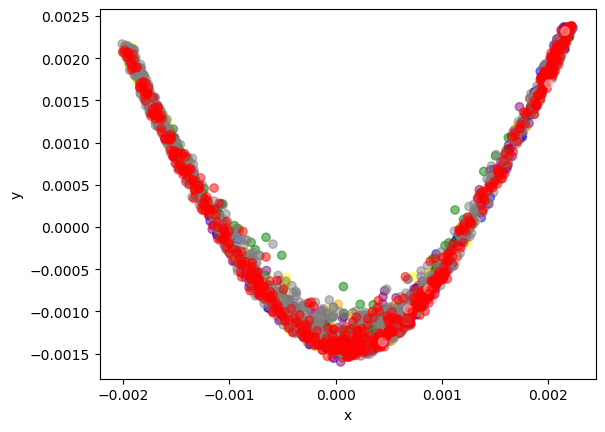

In [8]:
import seaborn as sns

sns.regplot(x='x',
            y='y',
            data=df2,
            fit_reg=False,  # do not fit a regression line
            x_jitter=0.00005,  # could also dynamically set this with range of data
            y_jitter=0.00005,
            scatter_kws={'alpha': 0.5, 'color': colors}) # set transparency to 50% , use colors

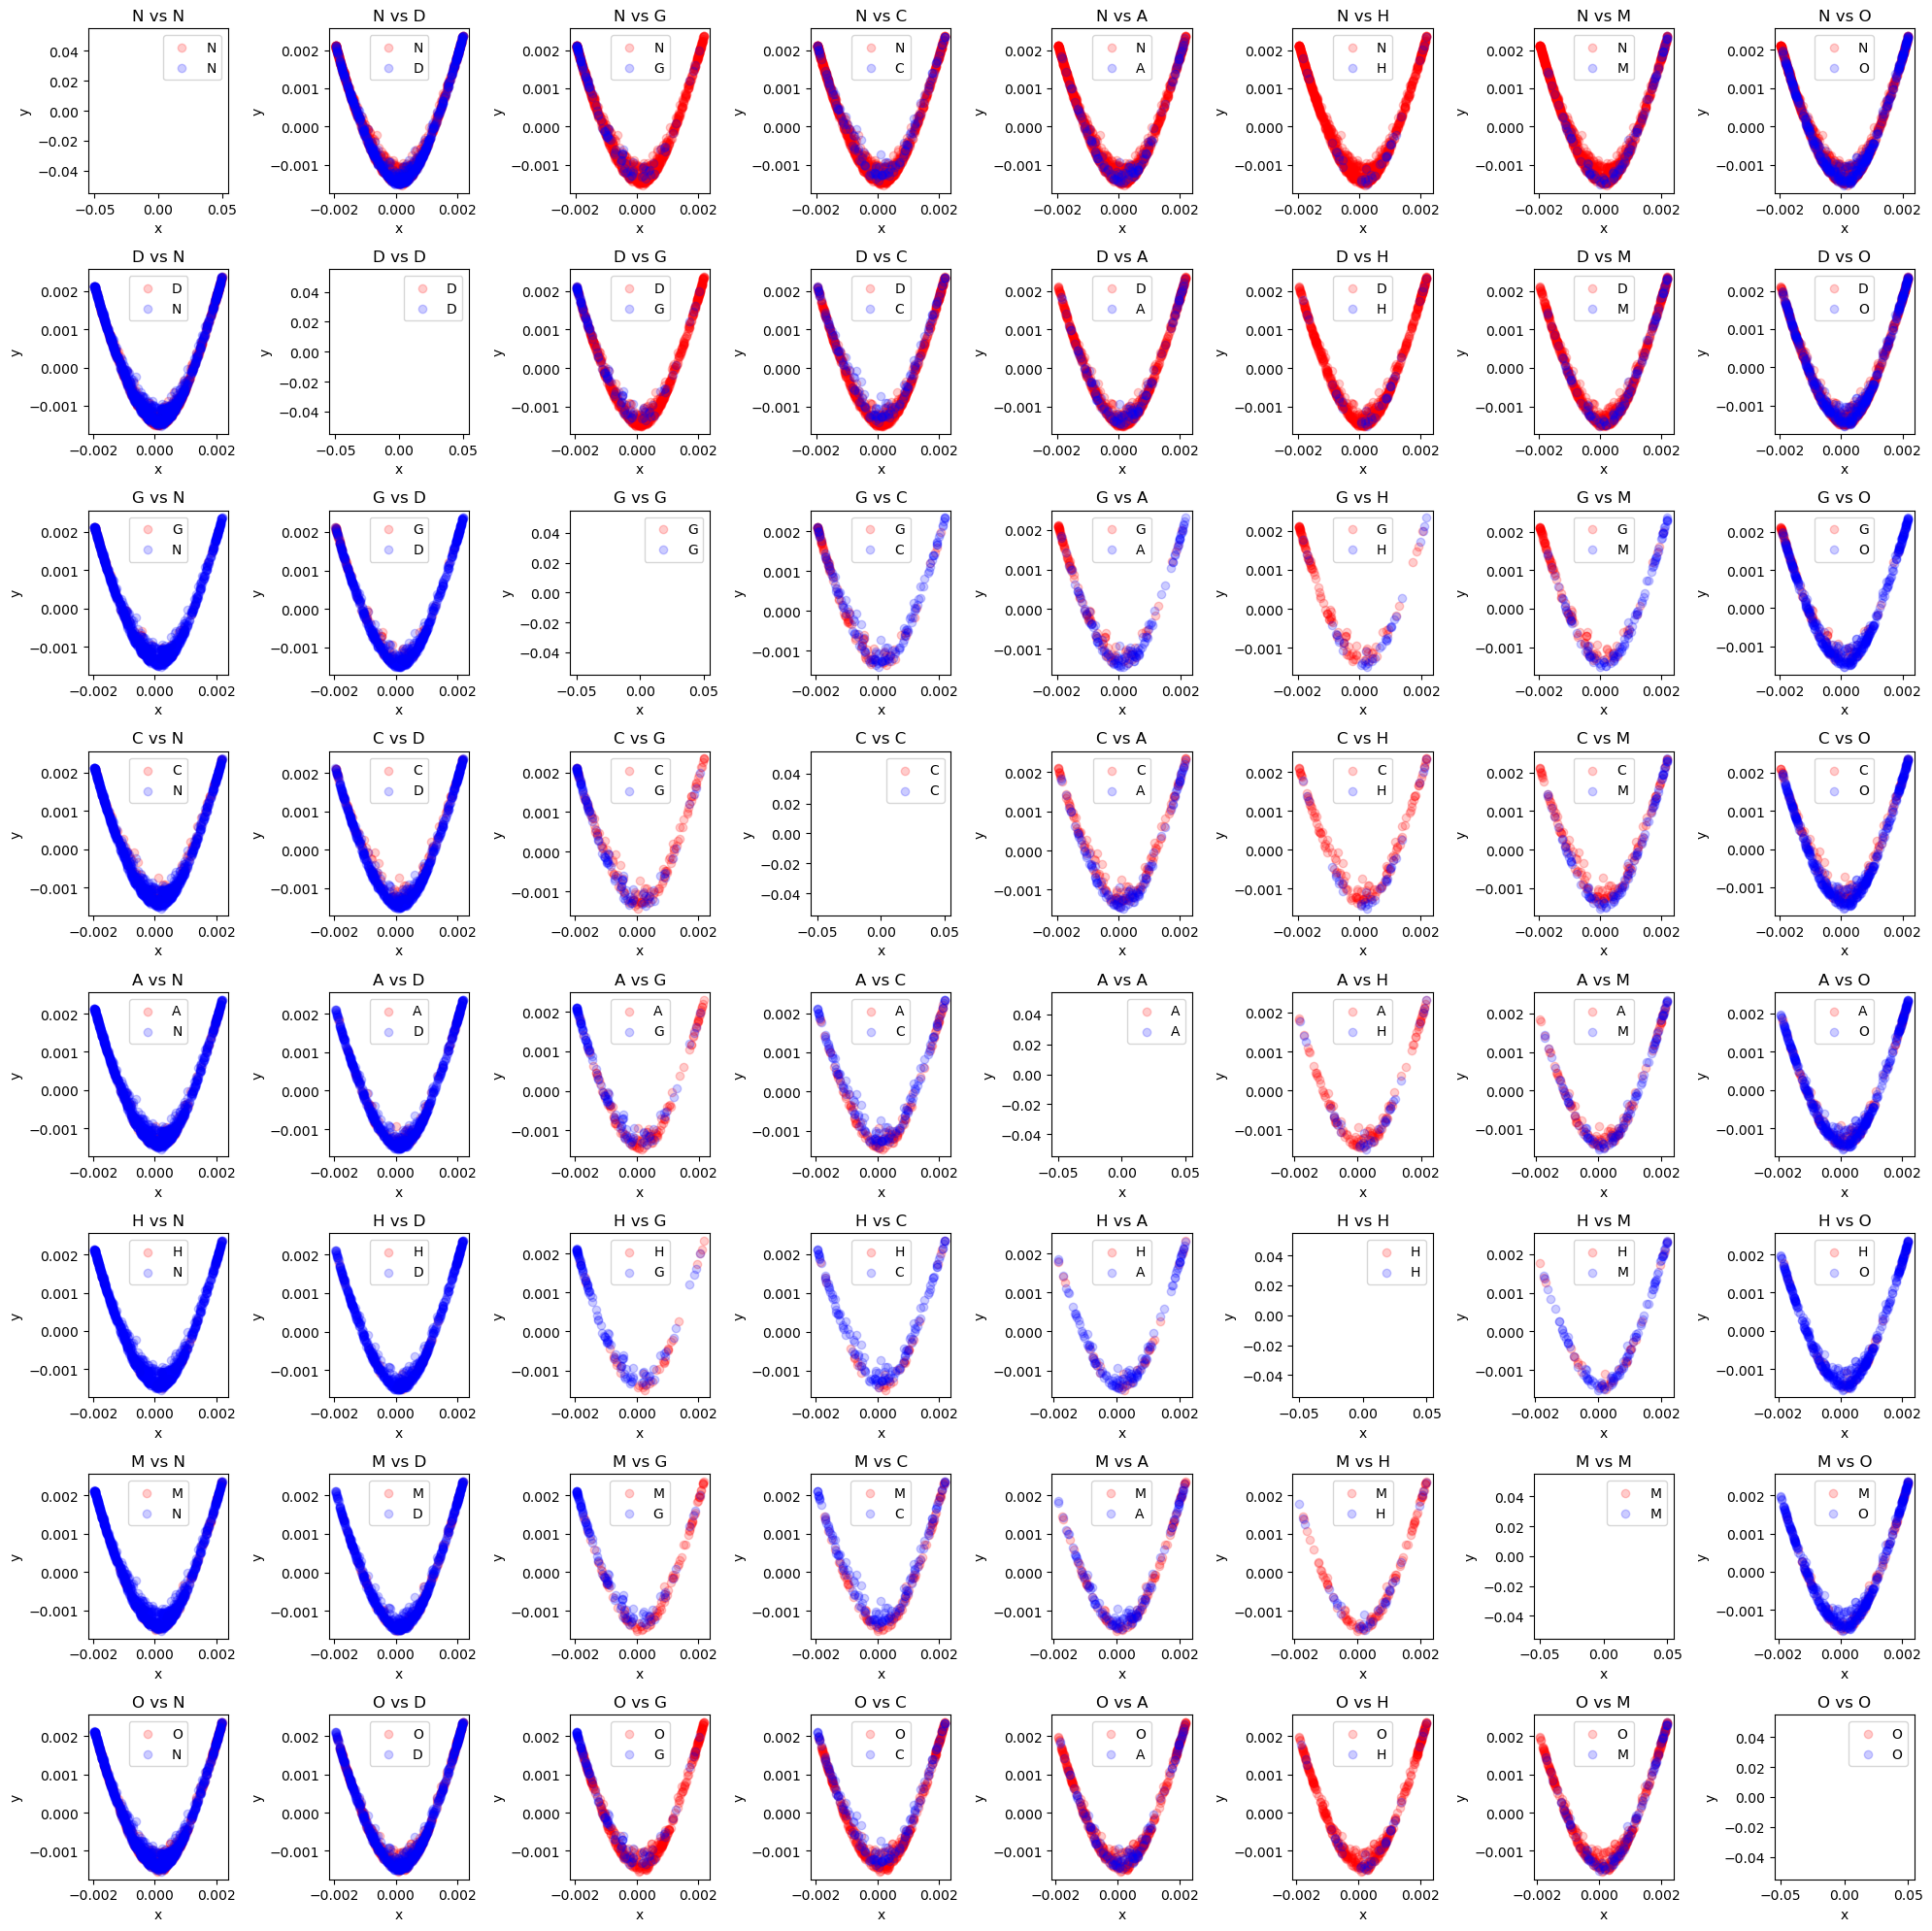

<Figure size 640x480 with 0 Axes>

In [9]:
indicators = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']

# Create an 8x8 grid of subplots
fig, axes = plt.subplots(8, 8, figsize=(20, 20))

# Iterate over the grid of subplots (8x8)
for i in range(8):
    for j in range(8):

        # Select two indicator variables to compare
        var1 = indicators[i]
        var2 = indicators[j]

        # Filter the data for the two indicator variables
        # Points where var1 == 1 and var2 == 0 (first class)
        class_1 = df2[(df2[var1] == 1) & (df2[var2] == 0)]

        # Points where var1 == 0 and var2 == 1 (second class)
        class_2 = df2[(df2[var1] == 0) & (df2[var2] == 1)]

        # Scatter plot for the first class (using color 'red')
        axes[i, j].scatter(class_1['x'], class_1['y'], color='red', label=var1, alpha=0.2)
        
        # Scatter plot for the second class (using color 'blue')
        axes[i, j].scatter(class_2['x'], class_2['y'], color='blue', label=var2, alpha=0.2)
        
        # Set plot labels
        axes[i, j].set_xlabel('x')
        axes[i, j].set_ylabel('y')
        axes[i, j].set_title(f'{var1} vs {var2}')

        # Optionally add a legend
        axes[i, j].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
plt.clf()

C:\Users\Debbie Olorunisola\AppData\Local\Temp\ipykernel_21264\3234662243.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


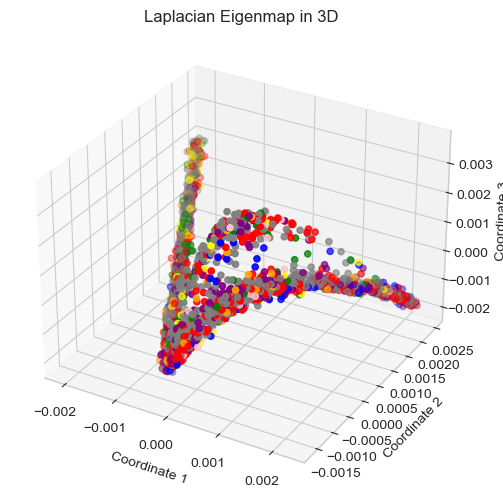

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df2['x'], df2['y'], df2['z'] are your original coordinates
jitter_strength = 0.00005  # adjust this based on your scale
x_jittered = df2['x'] + np.random.normal(0, jitter_strength, size=len(df2))
y_jittered = df2['y'] + np.random.normal(0, jitter_strength, size=len(df2))
z_jittered = df2['z'] + np.random.normal(0, jitter_strength, size=len(df2))

# Plotting
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x_jittered, y_jittered, z_jittered, c=colors, cmap=None)
plt.grid(True)
ax.axis('on')
plt.title("Laplacian Eigenmap in 3D")
ax.set_xlabel('Coordinate {}'.format(1))
ax.set_ylabel('Coordinate {}'.format(2))
ax.set_zlabel('Coordinate {}'.format(3))
plt.show()

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, perplexity=30, random_state=0)
reduced_2d = tsne.fit_transform(df2.iloc[:,10:19])

df3 = pd.DataFrame(reduced_2d, columns=["x", "y", "z"])
#add the metadata back
df3 = df3.join(df.iloc[:,3:11])
df3 = df3.reset_index()
label_columns = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
df3['label'] = df3[label_columns].idxmax(axis=1)

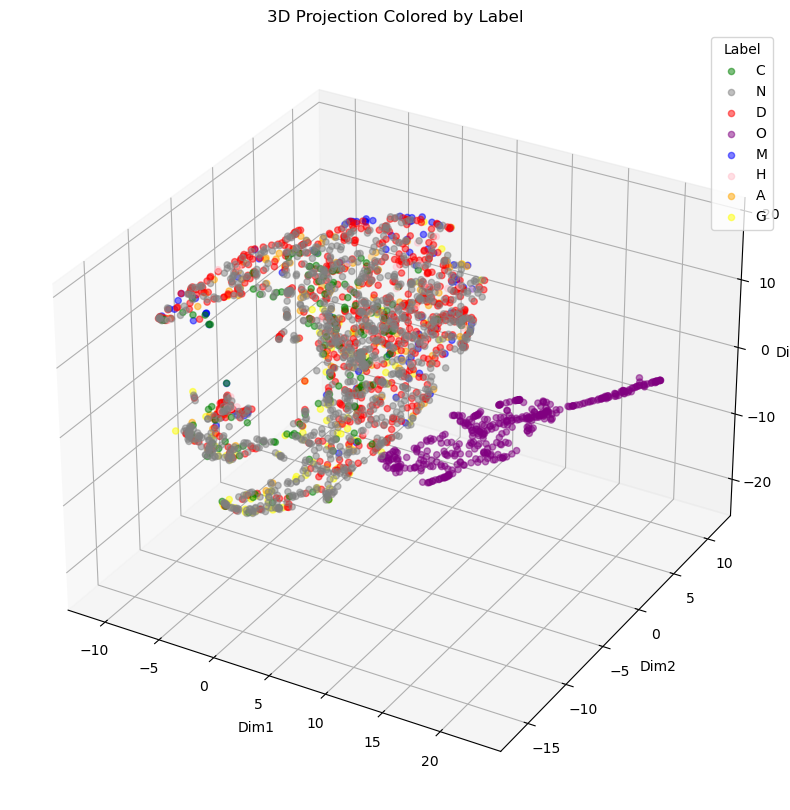

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Color map for consistent labeling
colors = {'N': 'grey', 'D': 'red', 'G': 'yellow', 'C': 'green',
          'A': 'orange', 'H': 'pink', 'M': 'blue', 'O': 'purple'}

for label in df3['label'].unique():
    subset = df3[df3['label'] == label]
    ax.scatter(
        subset['x'],
        subset['y'],
        subset['z'],
        label=label,
        color=colors.get(label, 'black'),
        alpha=0.5
    )

ax.set_xlabel("Dim1")
ax.set_ylabel("Dim2")
ax.set_zlabel("Dim3")
ax.set_title("t-SNE 3D Projection of Ocular Disease")
ax.legend(title="Label")
plt.show()

Laplacian of Pairs

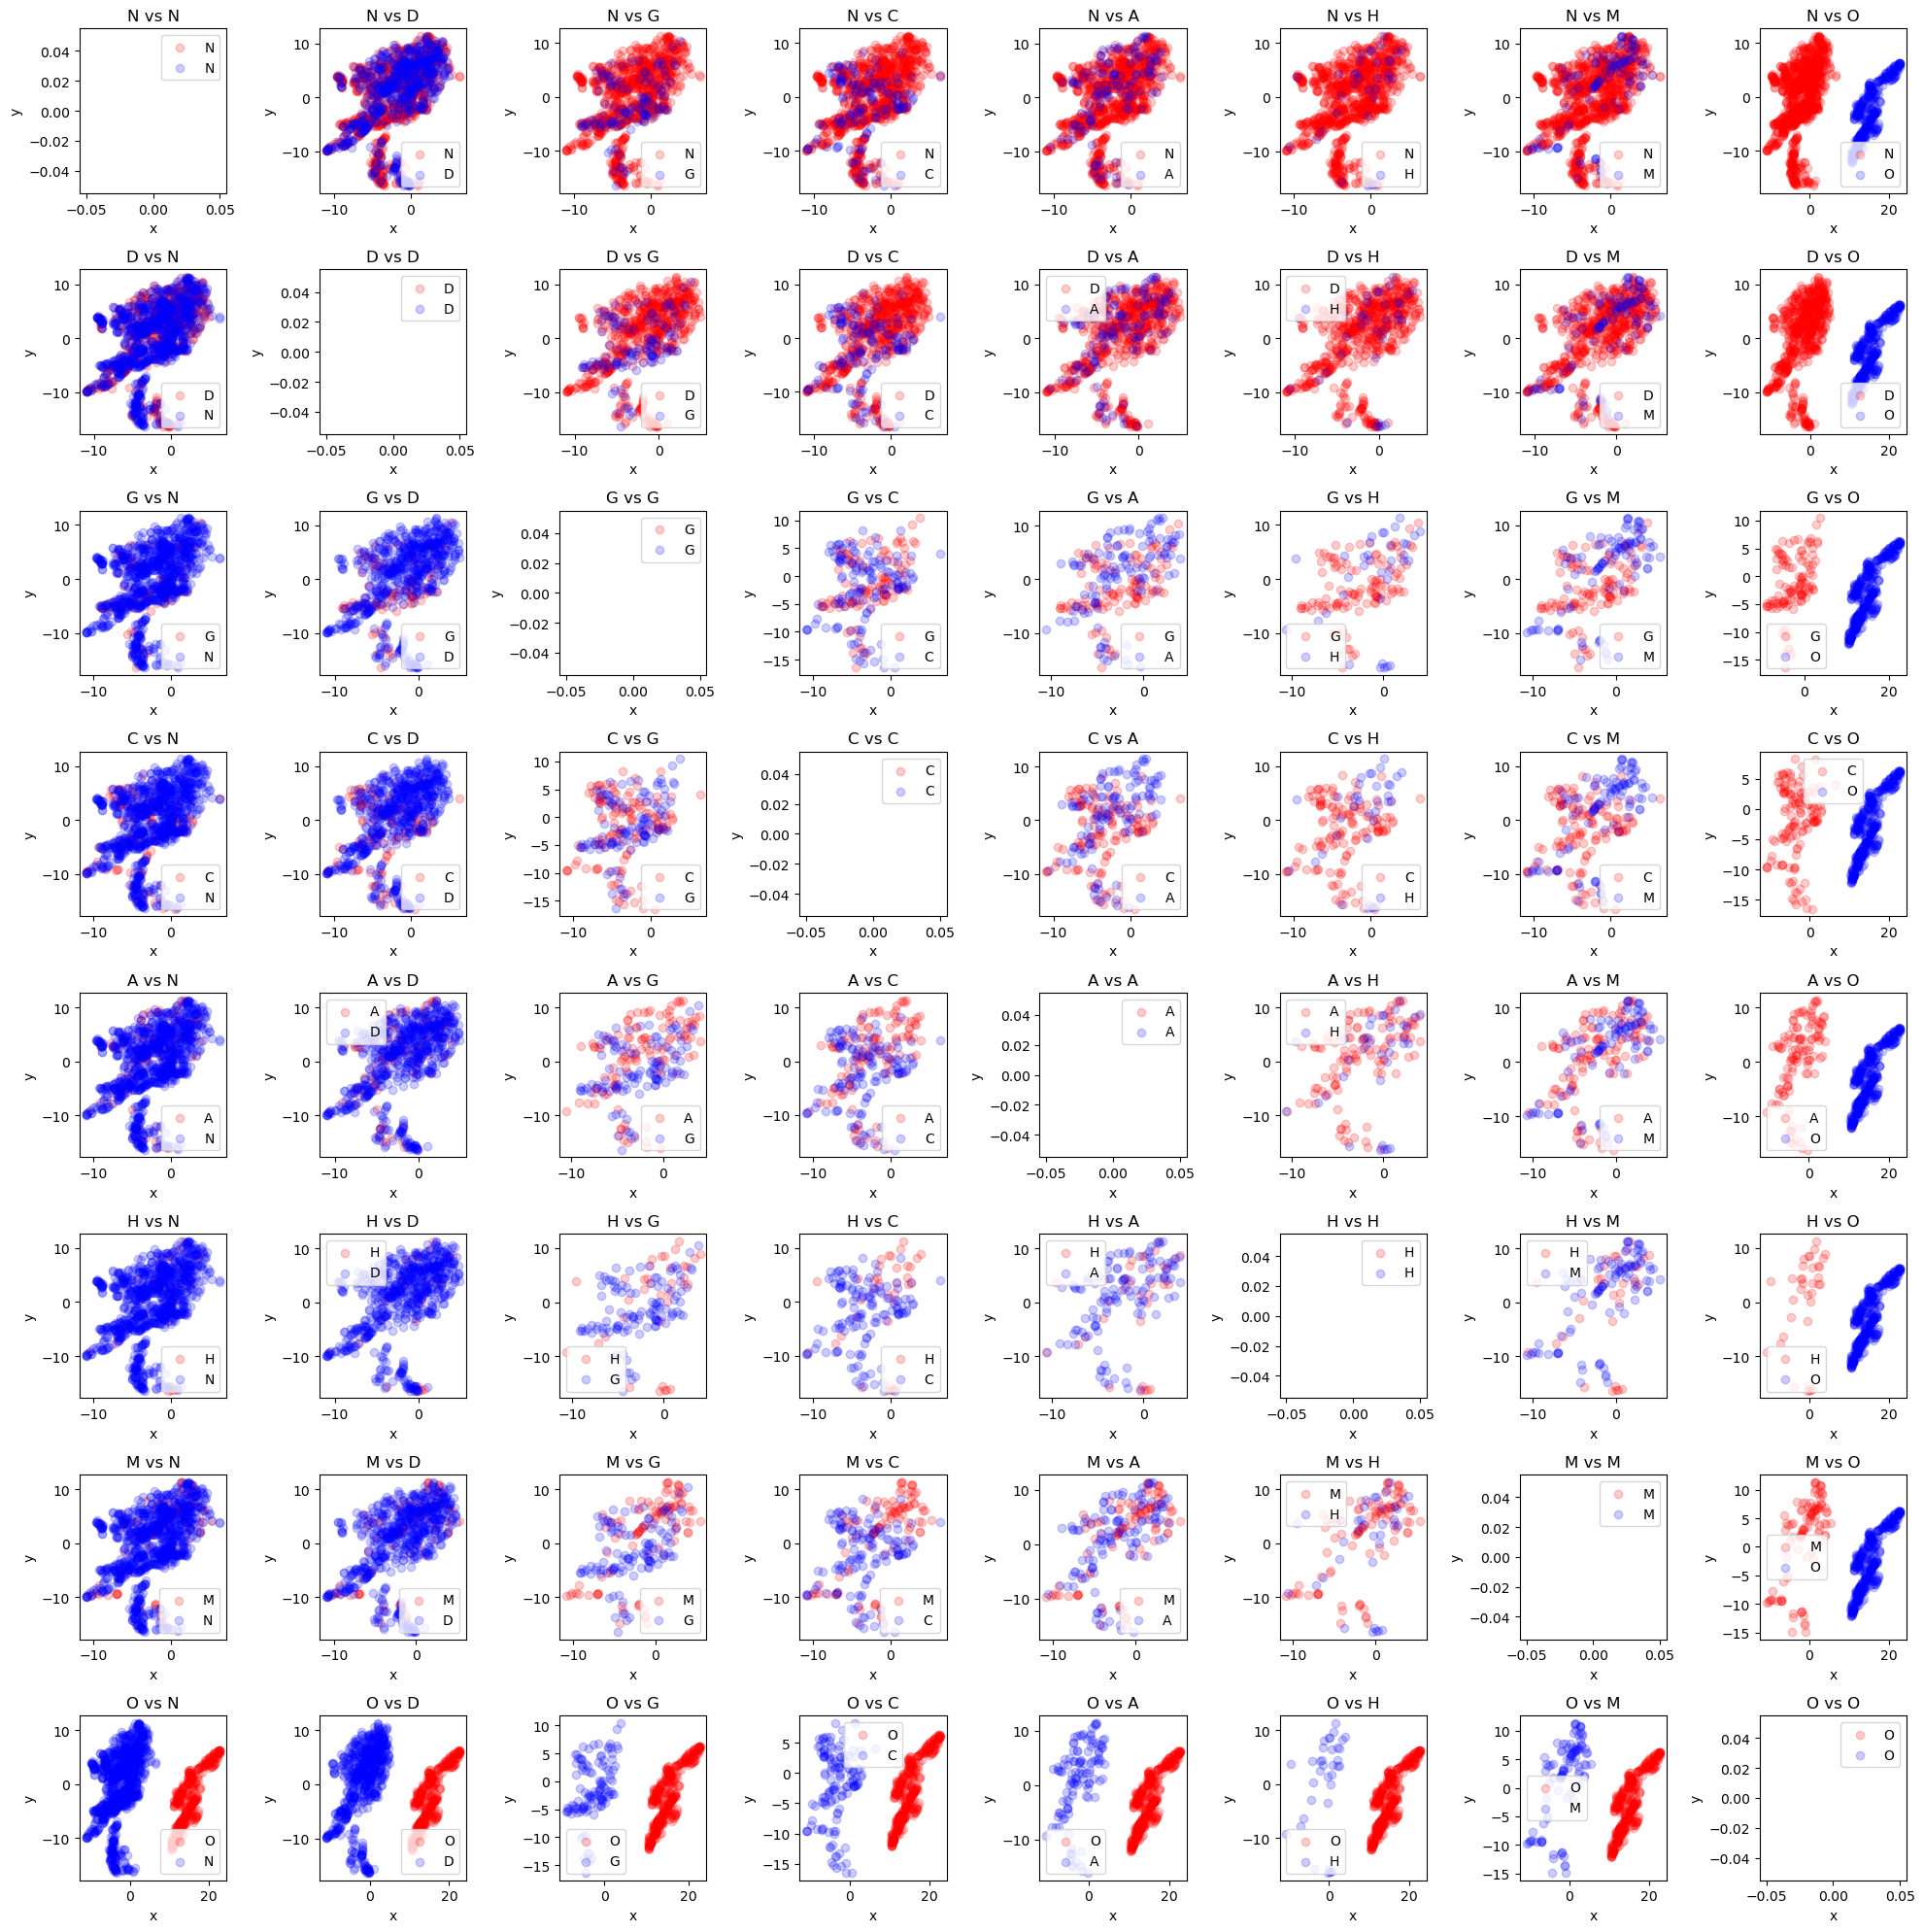

<Figure size 640x480 with 0 Axes>

In [8]:
indicators = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']

# Create an 8x8 grid of subplots
fig, axes = plt.subplots(8, 8, figsize=(20, 20))

# Iterate over the grid of subplots (8x8)
for i in range(8):
    for j in range(8):

        # Select two indicator variables to compare
        var1 = indicators[i]
        var2 = indicators[j]

        # Filter the data for the two indicator variables
        # Points where var1 == 1 and var2 == 0 (first class)
        class_1 = df3[(df3[var1] == 1) & (df3[var2] == 0)]

        # Points where var1 == 0 and var2 == 1 (second class)
        class_2 = df3[(df3[var1] == 0) & (df3[var2] == 1)]

        # Scatter plot for the first class (using color 'red')
        axes[i, j].scatter(class_1['x'], class_1['y'], color='red', label=var1, alpha=0.2)
        
        # Scatter plot for the second class (using color 'blue')
        axes[i, j].scatter(class_2['x'], class_2['y'], color='blue', label=var2, alpha=0.2)
        
        # Set plot labels
        axes[i, j].set_xlabel('x')
        axes[i, j].set_ylabel('y')
        axes[i, j].set_title(f'{var1} vs {var2}')

        # Optionally add a legend
        axes[i, j].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
plt.clf()